## Creating and solving the game

In [2]:
import numpy as np
from quantecon.game_theory import *
from scipy.spatial import HalfspaceIntersection

pd_payoff = np.array([[9.0, 1.0], [10.0, 3.0]])

A = Player(pd_payoff)
B = Player(pd_payoff)
nfg = NormalFormGame((A, B))

rpd = RepeatedGame(nfg, 0.75)

result_32, dist_history, time_history, figure_history, (C, H, Z) = \
rpd.outerapproximation(nH=32, tol=1e-4, linprog_method='simplex', verbose=True)

Iteration1
Distance0.96599025767
Iteration2
Distance0.724492693252
Iteration5
Distance0.308667670965
Iteration10
Distance0.0803995842487
Iteration25
Distance0.00107441670934
34
TOC: Elapsed: 0:00:47.84


## Algorithm animation

In [13]:
# With 32 gradients
from matplotlib import pyplot as plt, animation, rcParams, rc

rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

x = figure_history[0][:,0]
y = figure_history[0][:,1]

def animate(i):
    x = figure_history[i][:,0]
    y = figure_history[i][:,1]
    line.set_data(x,y)
    return (line,)

fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((-2,12.5))
ax.set_ylim((-2,12.5))
plt.scatter(x,y)
line, = ax.plot([],[],'o',lw=2)
animation.FuncAnimation(fig,animate,len(figure_history), interval=300)

In [14]:
# With 16 gradients
result_16, dist_history, time_history, figure_history, (C, H, Z)  = \
rpd.outerapproximation(nH=16, tol=1e-4, linprog_method='simplex')

x = figure_history[0][:,0]
y = figure_history[0][:,1]

fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((-10,20))
ax.set_ylim((-10,20))
plt.scatter(x,y)
line, = ax.plot([],[],'o',lw=2)
animation.FuncAnimation(fig, animate, len(figure_history), interval=300)

34
TOC: Elapsed: 0:00:18.02


In [15]:
# With 31 gradients
result_31, dist_history, time_history, figure_history, (C, H, Z)  = \
rpd.outerapproximation(nH=31, tol=1e-4, linprog_method='simplex')

x = figure_history[0][:,0]
y = figure_history[0][:,1]

fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((-10,20))
ax.set_ylim((-10,20))
plt.scatter(x,y)
line, = ax.plot([],[],'o',lw=2)
animation.FuncAnimation(fig, animate, len(figure_history), interval=300)

34
TOC: Elapsed: 0:01:14.02


In [16]:
# With 128 gradients
result_128, dist_history, time_history, figure_history, (C, H, Z)  = \
rpd.outerapproximation(nH=128, tol=1e-4, linprog_method='simplex')

x = figure_history[0][:,0]
y = figure_history[0][:,1]

fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((-10,20))
ax.set_ylim((-10,20))
plt.scatter(x,y)
line, = ax.plot([],[],'o',lw=2)
animation.FuncAnimation(fig, animate, len(figure_history), interval=300)

34
TOC: Elapsed: 0:22:37.88


In [17]:
# With 127 gradients
result_127, dist_history, time_history, figure_history, (C, H, Z)  = \
rpd.outerapproximation(nH=127, tol=1e-4, linprog_method='simplex')

x = figure_history[0][:,0]
y = figure_history[0][:,1]

fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((-10,20))
ax.set_ylim((-10,20))
plt.scatter(x,y)
line, = ax.plot([],[],'o',lw=2)
animation.FuncAnimation(fig, animate, len(figure_history), interval=300)

35
TOC: Elapsed: 0:18:26.39


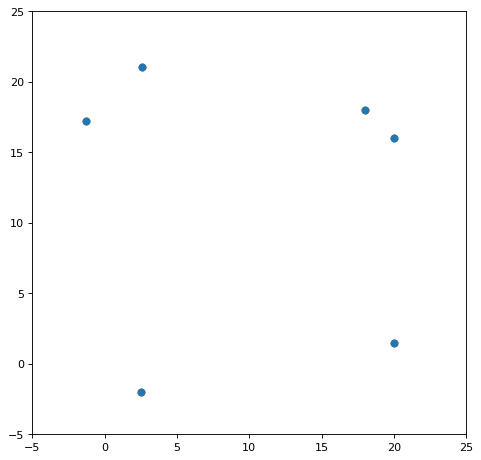

In [23]:
# A moderately good guess of the value set
guess_C = np.array([ 20.00017115, 25.45596399,  21.16595899,
                     13.08174746, -2.08048976, 2.43087133])

guess_Z = np.array([[20.00012836, 18.00009409, 12.34435949,
                     1.24983985, 1.4998567, 20.00012836],
                    [1.24983985, 18.00003305, 19.12512836,
                     20.00012836, 1.50015027, 1.24983985]])

guess_H = np.array([[  1.00000000e+00,   0.00000000e+00],
                    [  7.07106781e-01,   7.07106781e-01],
                    [  1.95090322e-01,   9.80785280e-01],
                    [ -7.07106781e-01,   7.07106781e-01],
                    [ -9.80785280e-01,  -1.95090322e-01],
                    [  1.95090322e-01,  -9.80785280e-01]])

guess_vertices = \
HalfspaceIntersection(np.column_stack((guess_H, -guess_C)), np.mean(guess_Z, axis=1)).intersections

x = guess_vertices[:][:, 0]
y = guess_vertices[:][:, 1]
plt.scatter(x,y)
plt.show()

In [19]:
result_guess, dist_history, time_history, figure_history, (C, H, Z) = \
rpd.outerapproximation(nH=6, tol=1e-4, linprog_method='simplex', init_guess=(guess_C, guess_H, guess_Z))

x = figure_history[0][:,0]
y = figure_history[0][:,1]

fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((-5,25))
ax.set_ylim((-5,25))
plt.scatter(x,y)
line, = ax.plot([],[],'o',lw=2)
animation.FuncAnimation(fig, animate, len(figure_history), interval=300)

38
TOC: Elapsed: 0:00:2.51


## Area comparison

In [20]:
import pandas as pd
from scipy.spatial import ConvexHull

columns = ["Number of gradients", "Area", "Area relative to min area"]
nb_gradients = np.array(["16", "31", "32", "127", "128", "6 (not from unit circle)"])
results = np.array([result_16, result_31, result_32, result_127, result_128, result_guess])
convex_hulls = np.array([ConvexHull(x) for x in results])
areas = np.array([round(x.area, 4) for x in convex_hulls])
relative_areas = np.array([round(area/min(areas)*100, 4) for area in areas])

df = pd.DataFrame(data=np.transpose((nb_gradients, areas, relative_areas)), columns=columns)
df

,Number of gradients,Area,Area relative to min area
0,16,26.3979,102.6517
1,31,27.6691,107.5949
2,32,26.197,101.8704
3,127,26.1029,101.5045
4,128,25.716,100.0
5,6 (not from unit circle),34.282,133.31


In [4]:
nHs = [16, 30, 32, 40, 50, 60, 64, 70, 80, 90, 110, 128]
output = []

for nH in nHs:
    output.append(rpd.outerapproximation(nH=nH, tol=1e-4, linprog_method='simplex'))

34
TOC: Elapsed: 0:00:14.17
34
TOC: Elapsed: 0:00:43.36
34
TOC: Elapsed: 0:00:45.22
34
TOC: Elapsed: 0:01:12.22
36
TOC: Elapsed: 0:01:56.73
34
TOC: Elapsed: 0:03:1.44
34
TOC: Elapsed: 0:03:6.61
36
TOC: Elapsed: 0:03:50.57
34
TOC: Elapsed: 0:05:15.82
36
TOC: Elapsed: 0:07:19.41
35
TOC: Elapsed: 0:13:6.09
34
TOC: Elapsed: 0:26:38.57


In [21]:
convex_hulls = np.array([ConvexHull(x[0]) for x in output])
areas = np.array([round(x.area, 4) for x in convex_hulls])
relative_areas = np.array([round(area/min(areas)*100, 4) for area in areas])

df = pd.DataFrame(data=np.transpose((nHs, areas, relative_areas)), columns=columns)
df

,Number of gradients,Area,Area relative to min area
0,16.0,26.3979,102.7316
1,30.0,26.8183,104.3676
2,32.0,26.1970,101.9497
3,40.0,25.9072,100.8219
4,50.0,26.3712,102.6276
5,60.0,25.6960,100.0000
6,64.0,25.7264,100.1183
7,70.0,26.1435,101.7415
8,80.0,25.8103,100.4448
9,90.0,26.0449,101.3578


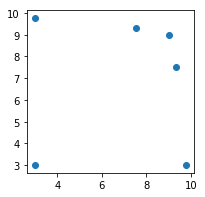

In [24]:
x = output[5][0][:, 0]
y = output[5][0][:, 1]
plt.scatter(x,y)
plt.show()